<a href="https://colab.research.google.com/github/ThoriqIrfan/PCVKJOBSHEETS/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

 Gamma correction 
-------------------
Enter the Gamma Value: 3


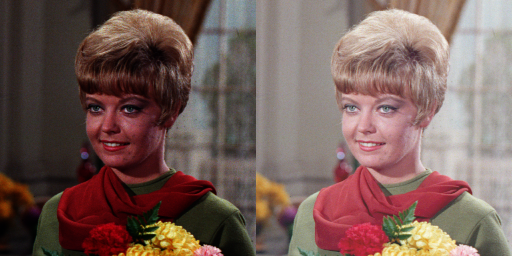

In [10]:
print(' Gamma correction ')
print('-------------------')

try:
  gamma = int(input('Enter the Gamma Value: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Image drive/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Bit Depth 
------------
Enter the Bit Depth Value [1-7]: 1


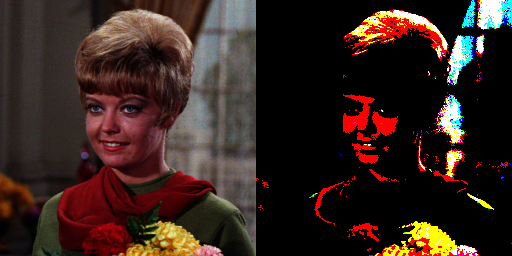

In [8]:
print(' Bit Depth ')
print('------------')

try:
  bit_depth = int(input('Enter the Bit Depth Value [1-7]: '))
except ValueError:
  print('Error, not a number')

bit = 2**bit_depth
level = 255/(bit-1)

bit_depth_image = np.zeros(original.shape, original.dtype)

#access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      bit_depth_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

 Bit Depth 
------------
Enter the Bit Depth Value [1-7]: 6


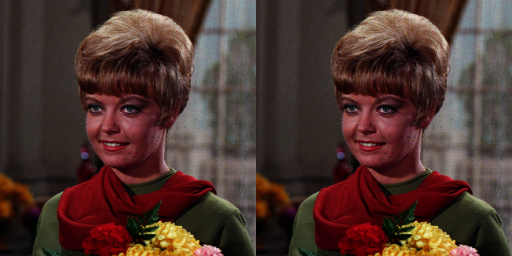

In [9]:
print(' Bit Depth ')
print('------------')

try:
  bit_depth = int(input('Enter the Bit Depth Value [1-7]: '))
except ValueError:
  print('Error, not a number')

bit = 2**bit_depth
level = 255/(bit-1)

bit_depth_image = np.zeros(original.shape, original.dtype)

#access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      bit_depth_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

In [11]:
import glob
from math import log10, sqrt

The Psnr value is 27.53743916156828 (dB)


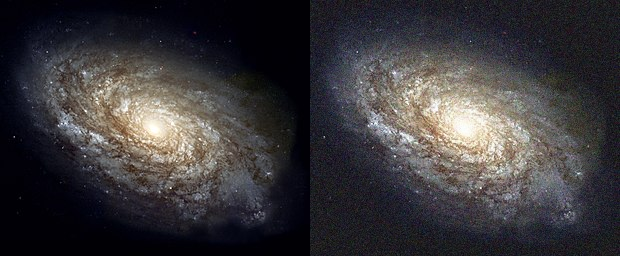

In [13]:
#oh boy this one's a doozy
#lets start with the average number of images: 5
img_cv= []
original = cv.imread('/content/drive/MyDrive/Image drive/Images/galaxy.jpg')
for img in glob.glob('/content/drive/MyDrive/Image drive/Images/noises/*.jpg'):
    n = cv.imread(img)
    img_cv.append(n)

dst = img_cv[0]
noise_number = 4
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(img_cv[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('The Psnr value is' ,psnr,'(dB)')

galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

The Psnr value is 27.52086505776816 (dB)


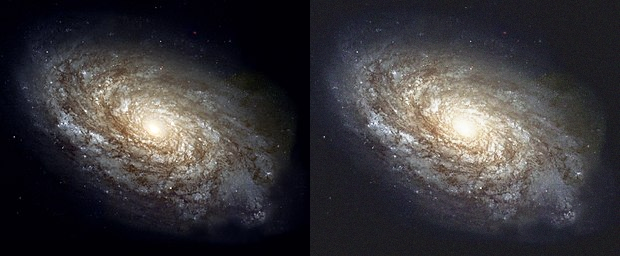

In [14]:
#30 now
dst = img_cv[0]
noise_number = 29
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(img_cv[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('The Psnr value is' ,psnr,'(dB)')

galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

The Psnr value is 27.485757638732142 (dB)


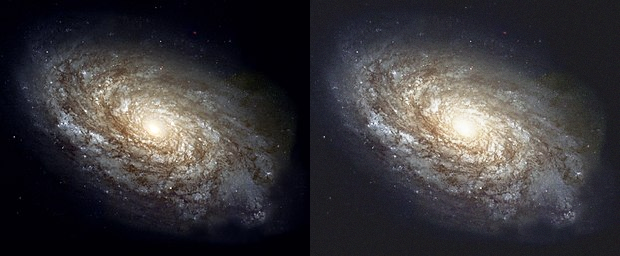

In [15]:
#60 now

dst = img_cv[0]
noise_number = 59
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(img_cv[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('The Psnr value is' ,psnr,'(dB)')

galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

The Psnr value is 27.507500880013627 (dB)


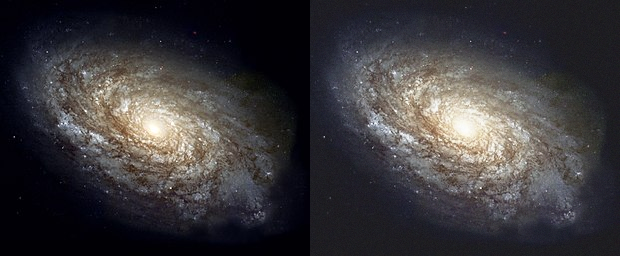

In [16]:
#80
dst = img_cv[0]
noise_number = 79
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(img_cv[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('The Psnr value is' ,psnr,'(dB)')

galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

The Psnr value is 27.518003238591472 (dB)


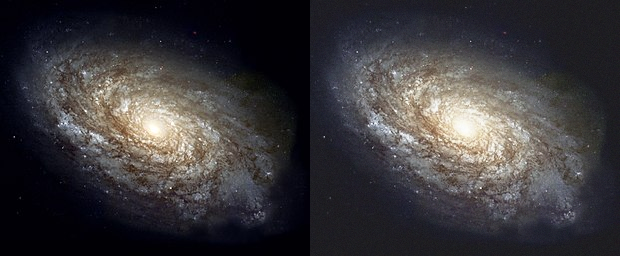

In [17]:
#100

dst = img_cv[0]
noise_number = 99
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(img_cv[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('The Psnr value is' ,psnr,'(dB)')

galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

From what I see from these results, it seems like the results of PSNR value fluctuates heavily with lower average sample size, but we can see from the 80 -100, the fluctuations get smaller than the previous one.

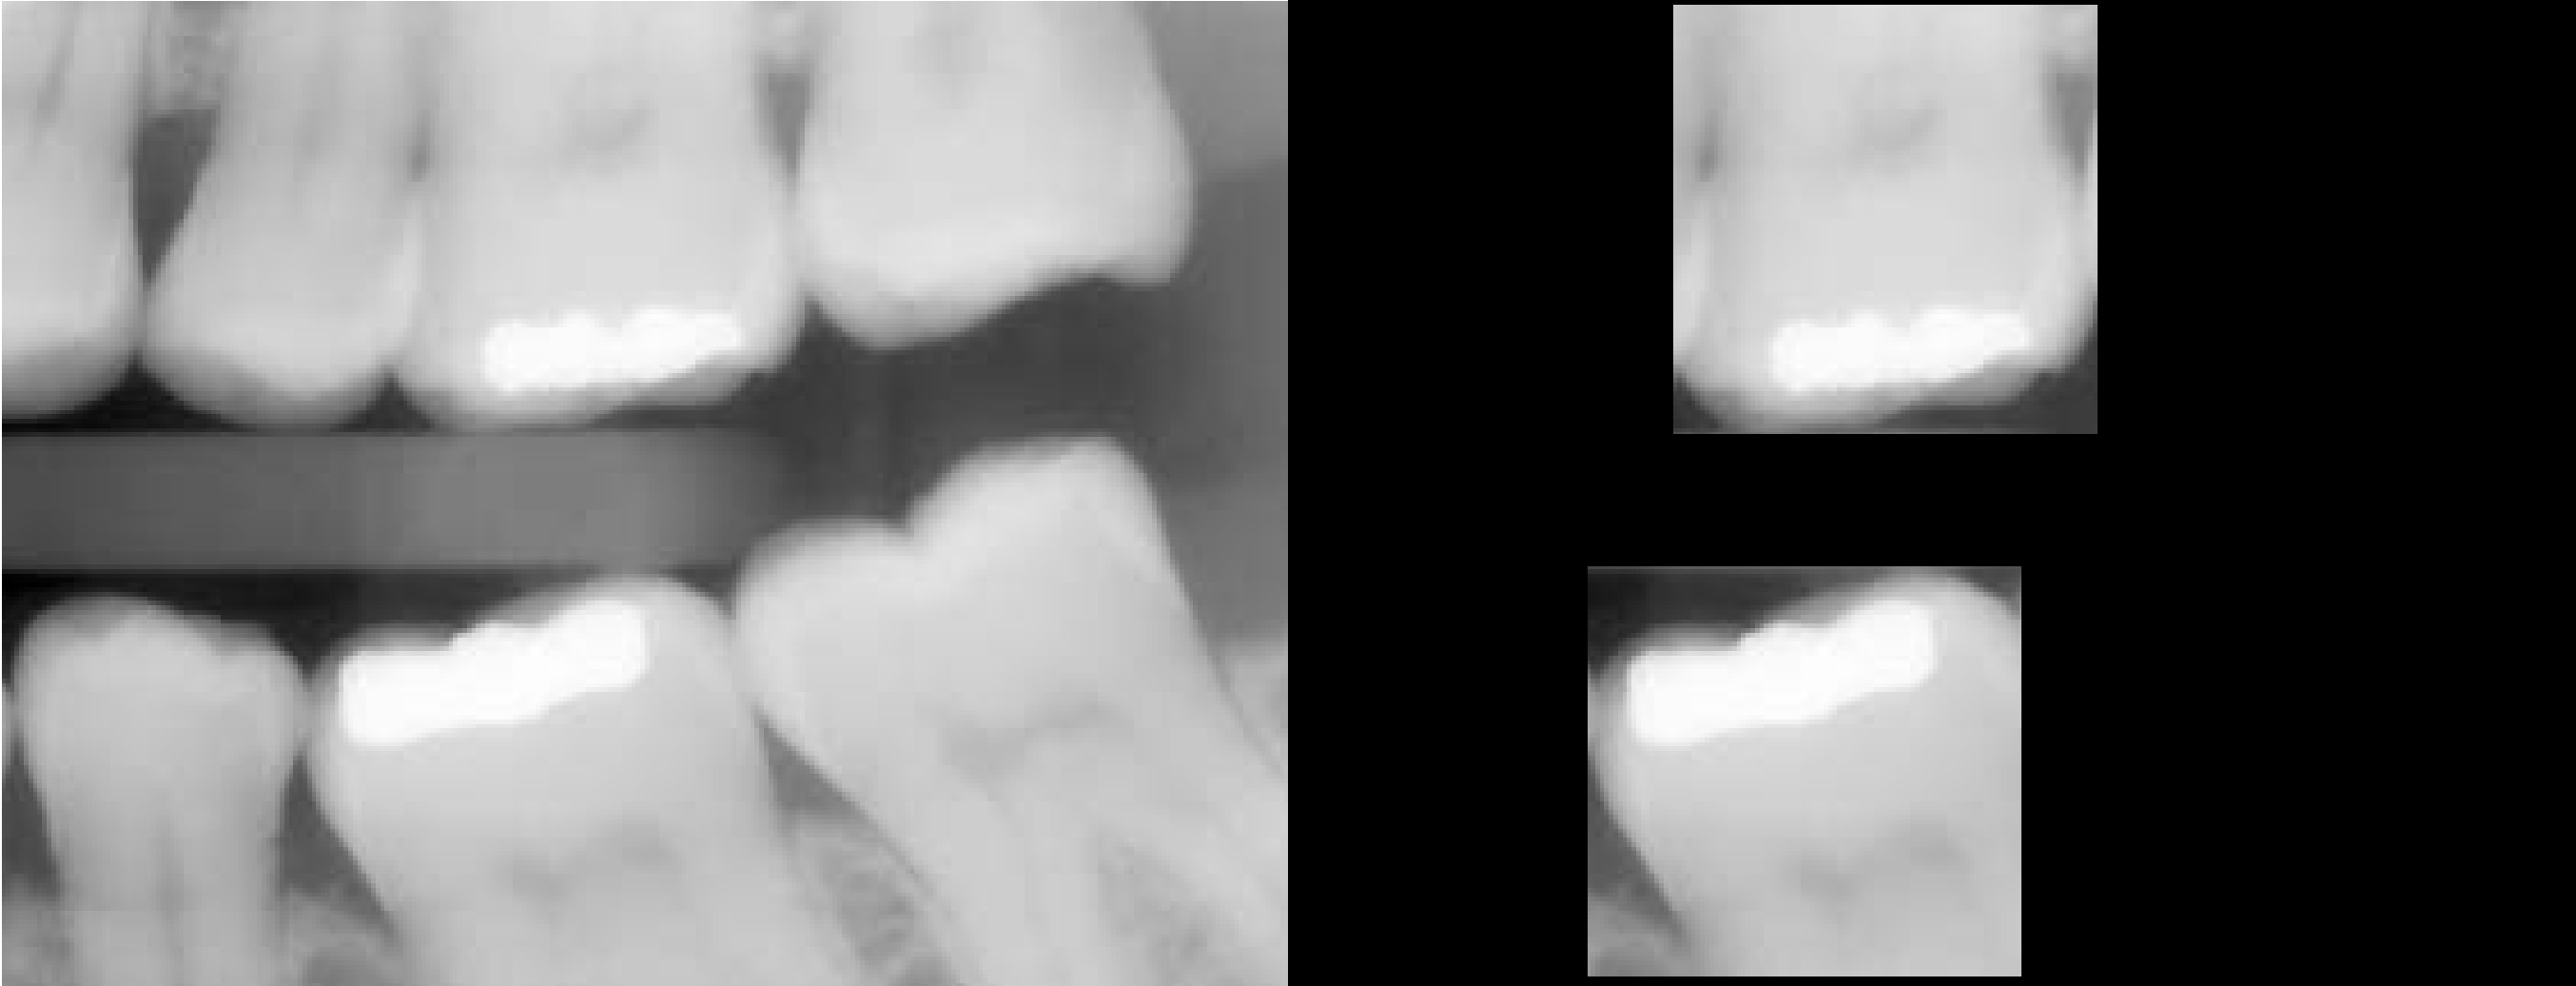

In [19]:
#masking tiem




img_teeth = cv.imread('/content/drive/MyDrive/Image drive/Images/teeth.jpg')

mask = np.zeros(img_teeth.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img_teeth & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img_teeth & mask1

teeth_frame = cv.hconcat((img_teeth, result))
cv2_imshow(teeth_frame)

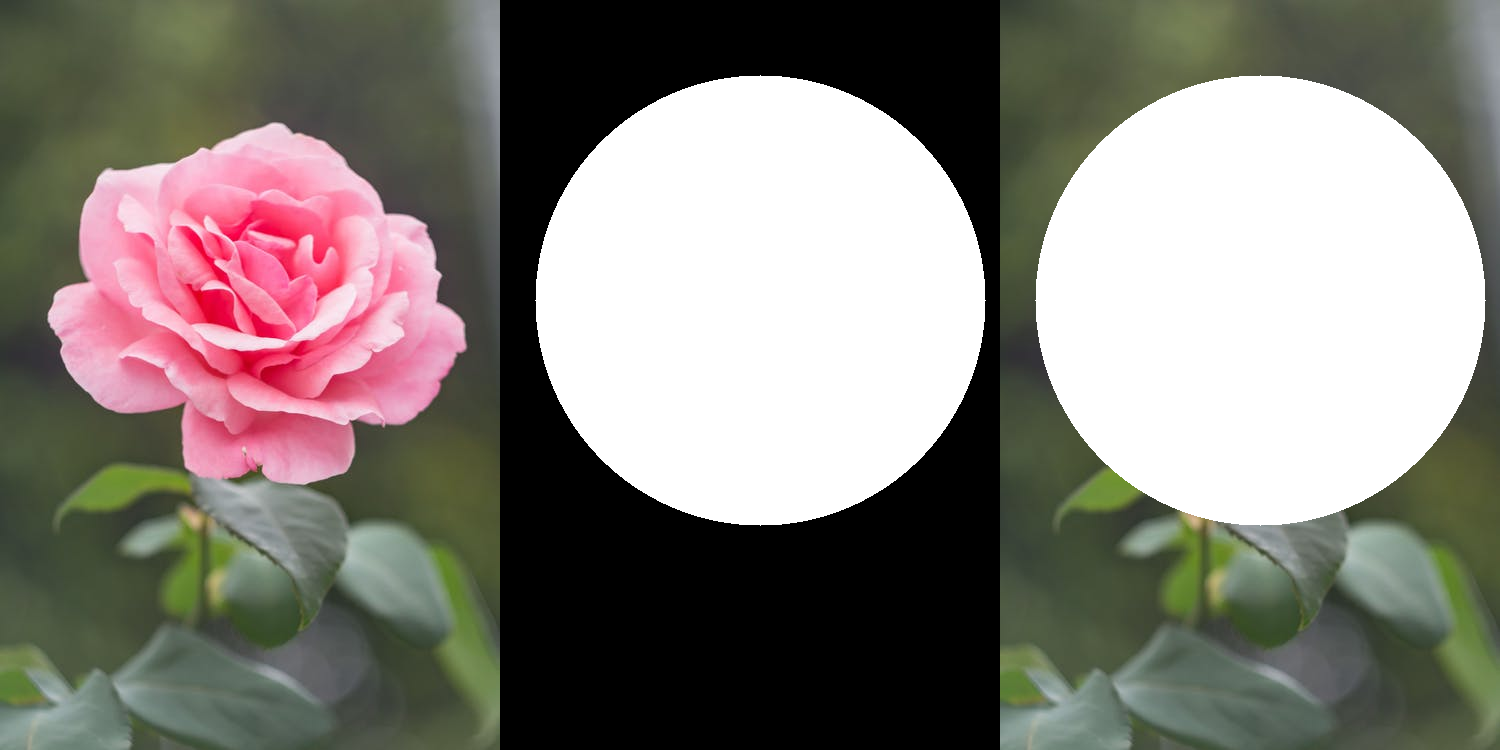

In [20]:
#OPERATOR OR
img_rose = cv.imread('/content/drive/MyDrive/Image drive/Images/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

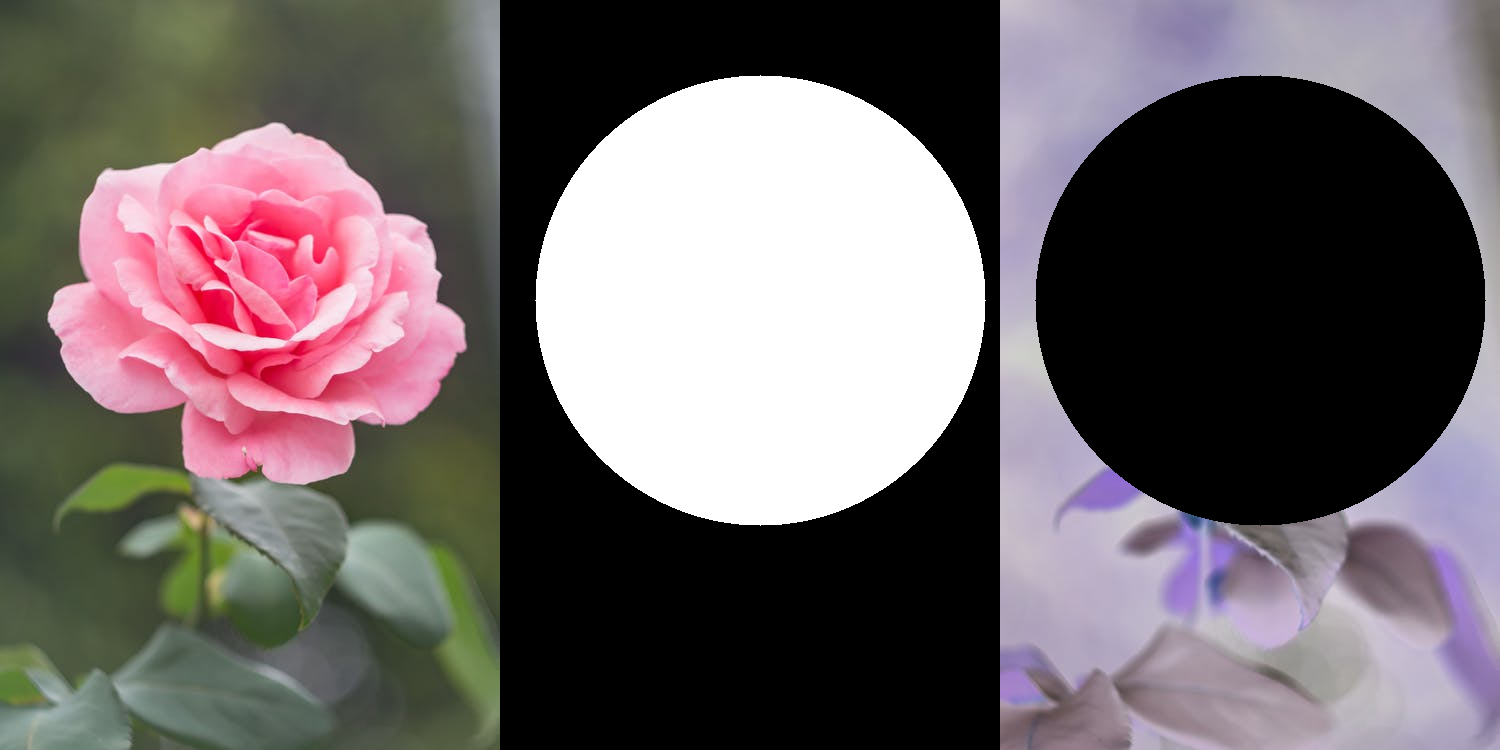

In [21]:
#OPERATOR NOT
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

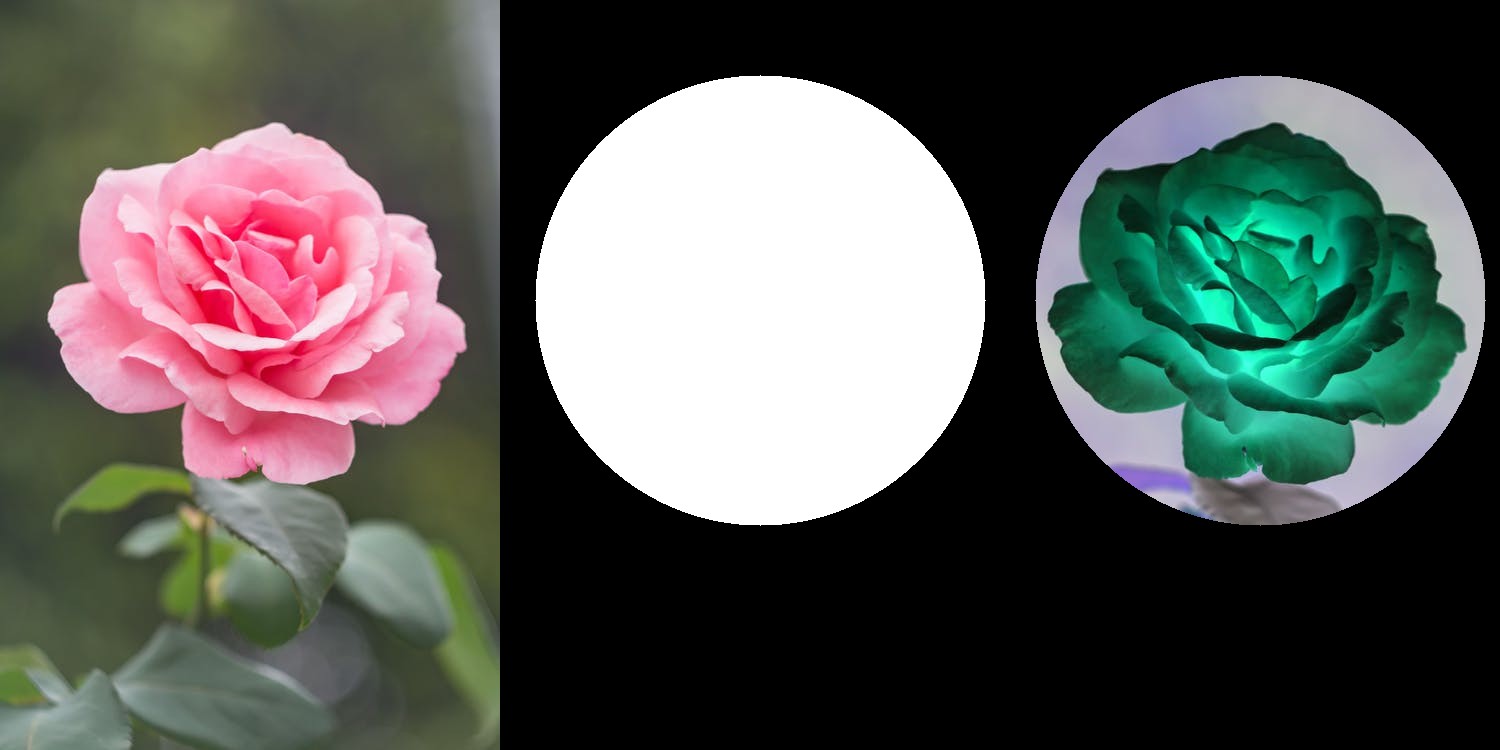

In [22]:
#OPERATOR NAND

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

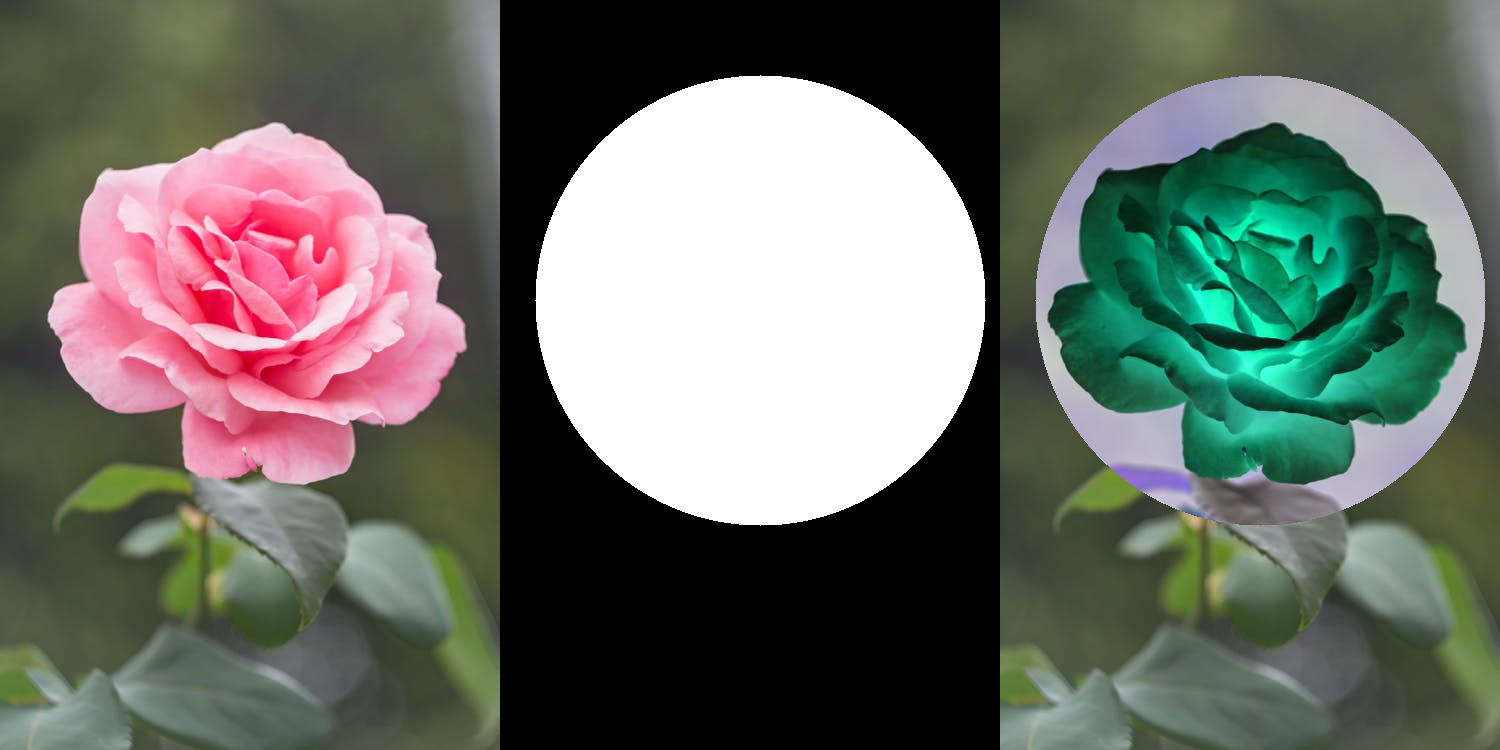

In [23]:
#OPERATOR XOR
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

These operators seem to have unique interactions with the mask image and background image